In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import glob, os , datetime
import imutils
from scipy.spatial import distance
import cv2 

In [60]:
glob.glob("Dados\\*")

['Dados\\Dupla1_mov-2022-08-23 174511755259.pkl',
 'Dados\\Dupla2_mov-2022-08-23 175419054358.pkl',
 'Dados\\Dupla3_mov-2022-08-23 180620140634.pkl',
 'Dados\\Run1_AliceMathilde_MusicaCompleta_mp4-2022-08-23 160806309854.pkl',
 'Dados\\Run1_AliceMathilde_MusicaCompleta_mp4-2022-08-23 163411846927.pkl',
 'Dados\\Run1_AliceMathilde_MusicaCompleta_mp4-2022-08-23 172044069569.pkl',
 'Dados\\Run1_HelenaFernanda_MusicaCompleta_mov-2022-08-23 162124617445.pkl']

In [12]:
df = pd.read_pickle('Dados\\Run1_AliceMathilde_MusicaCompleta_mp4-2022-08-23 172044069569.pkl')

In [13]:
df

,motion_right,motion_left,motion_right_scaled,motion_left_scaled,time
0,229.220963,120.130138,0.237616,0.010963,0.000199
1,229.220963,119.466523,0.237616,0.000000,0.000398
2,229.220963,119.676648,0.237616,0.003471,0.000596
3,229.220963,121.458841,0.237616,0.032913,0.000795
4,229.617073,121.247680,0.240270,0.029424,0.000994
...,...,...,...,...,...
5025,234.939354,180.000000,0.275933,1.000000,0.999205
5026,233.106199,180.000000,0.263649,1.000000,0.999404
5027,232.513440,180.000000,0.259678,1.000000,0.999602
5028,231.603109,126.385324,0.253578,0.114297,0.999801


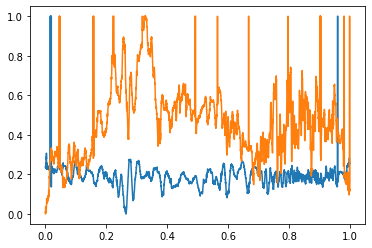

In [14]:
plt.clf()
plt.plot(df.time,scaler.transform(df[["motion_right","motion_left"]]))

In [15]:
tempos_duplas = pd.read_excel("Tempos_duplas.xlsx")

In [16]:
tempos_duplas

,SegmentoPartitura,Dupla1,Dupla2,Dupla3,Dupla5,Dupla6,Dupla7,Dupla8
0,NaN,Inicio(Seg),Inicio(Seg),Inicio(Seg),Inicio(Seg),Inicio(Seg),Inicio(Seg),Inicio(Seg)
1,1,7,7,7,7,5,10,7
2,2,24,24,31,27,25,26,23
3,3,42,43,55,48,45,43,42
4,4,58,61,78,67,64,63,62
5,5,73,80,100,84,82,82,82
6,6,103,113,141,115,115,118,117
7,7,113,122,153,127,127,128,127
8,8,128,136,170,144,146,143,145
9,9,135,143,177,154,154,150,153


In [24]:
dupla = "Dupla7"
inicio = (tempos_duplas[dupla].values[1])/(tempos_duplas[dupla].values[11])
fimPerf = (tempos_duplas[dupla].values[10])/(tempos_duplas[dupla].values[11])

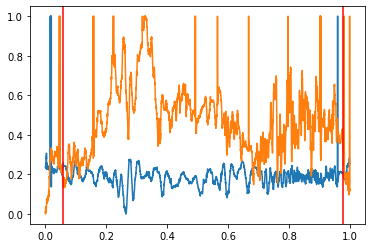

In [45]:
plt.clf()
plt.plot(df.time,df[["motion_right_scaled","motion_left_scaled"]])
plt.axvline(inicio,color="red")
plt.axvline(fimPerf,color="red")

In [40]:
df2 = df[(df.time>=inicio) & (df.time<=fimPerf)].reset_index()
df2["time_ajust"] = (df2.index+1)/len(df2)

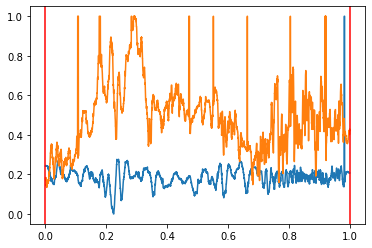

In [48]:
plt.clf()
plt.plot(df2.time_ajust,df2[["motion_right_scaled","motion_left_scaled"]])
plt.axvline(0,color="red")
plt.axvline(1,color="red")

In [61]:
files = ['Dados\\Dupla1_mov-2022-08-23 174511755259.pkl',
         'Dados\\Dupla2_mov-2022-08-23 175419054358.pkl',
        'Dados\\Dupla3_mov-2022-08-23 180620140634.pkl']

######## - Dupla1 - ########


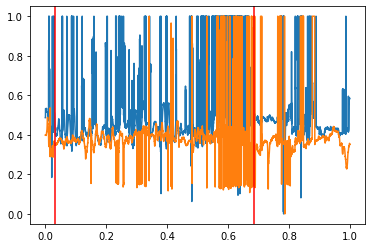

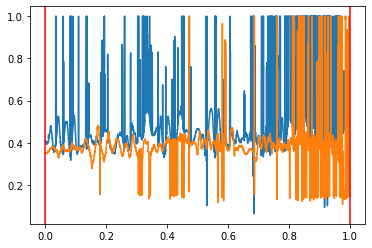

######## - Dupla2 - ########


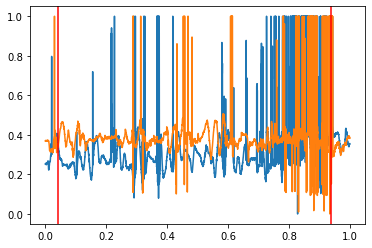

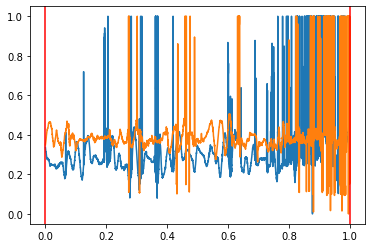

######## - Dupla3 - ########


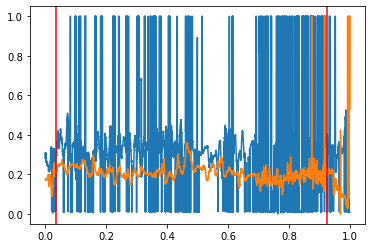

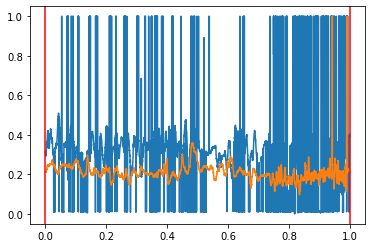

In [62]:
for file in files:
    
    df = pd.read_pickle(file)
    dupla = file[6:12]
    print(f"######## - {dupla} - ########")
    inicio = (tempos_duplas[dupla].values[1])/(tempos_duplas[dupla].values[11])
    fimPerf = (tempos_duplas[dupla].values[10])/(tempos_duplas[dupla].values[11])
    plt.clf()
    plt.plot(df.time,df[["motion_right_scaled","motion_left_scaled"]])
    plt.axvline(inicio,color="red")
    plt.axvline(fimPerf,color="red")
    plt.show()
    df2 = df[(df.time>=inicio) & (df.time<=fimPerf)].reset_index()
    df2["time_ajust"] = (df2.index+1)/len(df2)
    plt.clf()
    plt.plot(df2.time_ajust,df2[["motion_right_scaled","motion_left_scaled"]])
    plt.axvline(0,color="red")
    plt.axvline(1,color="red")
    plt.savefig(f"Figuras\\{dupla}.png")
    plt.show()

In [54]:
df2

,index,motion_right,motion_left,motion_right_scaled,motion_left_scaled,time,time_ajust
0,209,323.691597,323.575725,0.409535,0.348211,0.032746,0.000238
1,210,322.534107,323.284704,0.406140,0.347171,0.032902,0.000477
2,211,322.615871,323.284704,0.406380,0.347171,0.033058,0.000715
3,212,322.586810,324.098750,0.406295,0.350079,0.033214,0.000953
4,213,321.459562,324.913835,0.402988,0.352992,0.033370,0.001192
...,...,...,...,...,...,...,...
4191,4400,351.482930,314.395054,0.491051,0.315409,0.686262,0.999047
4192,4401,352.115393,314.621201,0.492906,0.316217,0.686418,0.999285
4193,4402,352.363449,314.414138,0.493634,0.315477,0.686574,0.999523
4194,4403,352.296040,316.058934,0.493436,0.321354,0.686730,0.999762
